In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
from math import sqrt
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
# Call the model using the REST API exposed by CML

r = requests.post("https://modelservice.ml-7e38cf9c-d7a.pse-aw-e.ylcu-atmi.cloudera.site/model",
      data='{"accessKey": "m3pkzsb9bo14vlivi4ms0o64q0lxx77d",'\
           ' "request": {"predictions":24,'\
           '             "s3-bucket": "kdavis-pse-demo",'\
           '             "modelName": "airlines_pipeML_arima_b928f6ce475011ecae4cb61151e0fd24.pk1"}}',
      headers={"Content-Type": "application/json"})

pred = json.loads(r.text)["response"]
pred = pred.replace("[", "").replace("]", "").split(",")
pred = [float(p) for p in pred]


[7335.589639375366, 5227.656615423993, 3653.3769825954837, 4260.9817468742785, 6418.434634018055, 7073.170079198513, 6959.173895603988, 4601.544553230107, 4320.766917326839, 3861.9826380436066, 6448.772796950986, 7461.271947633327, 6546.989875227458, 4751.350803734507, 4337.861361212149, 3782.4060675958954, 6586.1394412942445, 7383.949321204302, 6525.168720122942, 4795.742460911665, 4309.108210061263, 3797.698209961856, 6593.653581051446, 7352.67625719599]


In [28]:
# Evaluate the model predictions against the training data set

df = pd.read_csv("resources/data/airlines/airlines.csv")
df.dropna(inplace=True)
dfAgg = df.groupby(["Time.Label"])["Statistics.Flights.Cancelled"].sum().reset_index()

trainPeriods = 24
y_test = dfAgg.tail(trainPeriods)["Statistics.Flights.Cancelled"]
y_test.reset_index(drop=True, inplace=True)

# Calculate the Root Mean Square Error

rmse = sqrt(mean_squared_error(pred, y_test))
print("RMSE: {}".format(rmse))
print("Mean of Actual Data: {}".format(y_test.mean()))



RMSE: 3029.9286189238546
Mean of Actual Data: 5444.208333333333


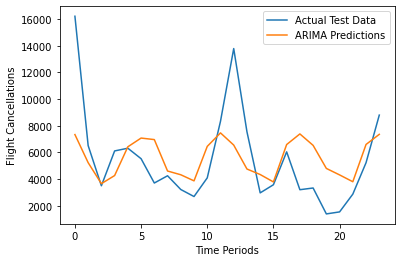

In [29]:
# Plot the actual values from the test data versus the fitted values 

fig, ax = plt.subplots(1, 1)
ax.plot(y_test, label="Actual Test Data")
ax.plot(pred, label="ARIMA Predictions")
ax.set_ylabel("Flight Cancellations")
ax.set_xlabel("Time Periods")
ax.legend()
plt.show()